<a href="https://colab.research.google.com/github/kunal266/Algo_Practice/blob/main/AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from statsmodels.tsa.ar_model import AR,ARResults

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('/content/drive/MyDrive/UDEMY_TSA_FINAL/Data/uspopulation.csv',index_col = 'DATE',parse_dates=True)

In [4]:
df.index.freq='MS'

In [5]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


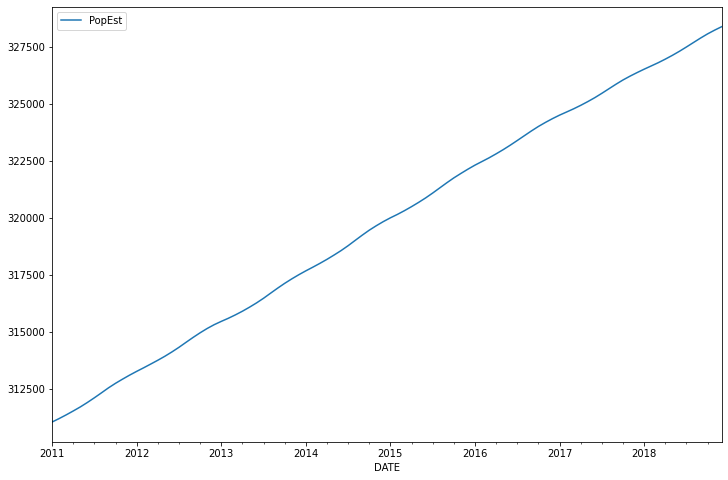

In [6]:
df.plot(figsize=(12,8))

In [7]:
len(df)

96

In [8]:
96-12

84

In [9]:
train = df.iloc[:84]
test = df.iloc[84:]

In [10]:
model = AR(train['PopEst'])

In [11]:
AR1fit = model.fit(maxlag=1,)

In [12]:
AR1fit.k_ar

1

In [13]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [14]:
start = len(train)

In [15]:
end = len(train) + len(test) -1

In [16]:
end

95

In [17]:
AR1fit.predict(start=start,end=end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [18]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [19]:
predictions1 = AR1fit.predict(start=start,end=end)

In [20]:
predictions1 = predictions1.rename('AR(1) Predictions')

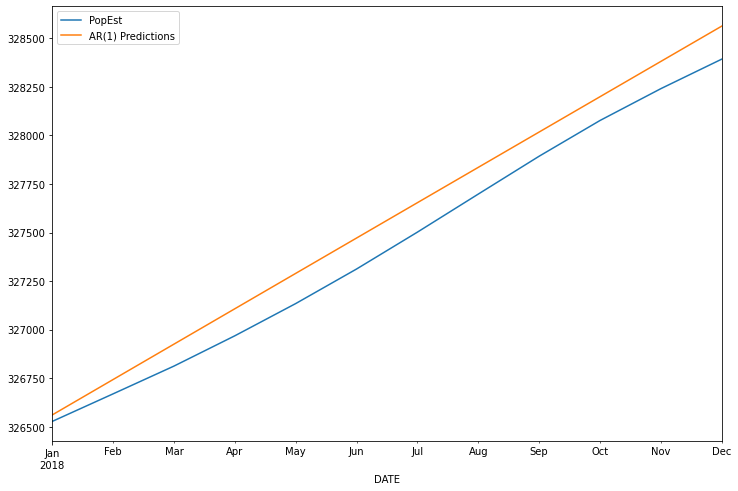

In [21]:
test.plot(figsize=(12,8),legend=True)
predictions1.plot(figsize=(12,8),legend=True)

In [22]:
AR2fit  = model.fit(maxlag=2)

In [23]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [24]:
predictions2 = AR2fit.predict(start,end)

In [25]:
predictions2 = predictions2.rename('AR(12) Predictions')

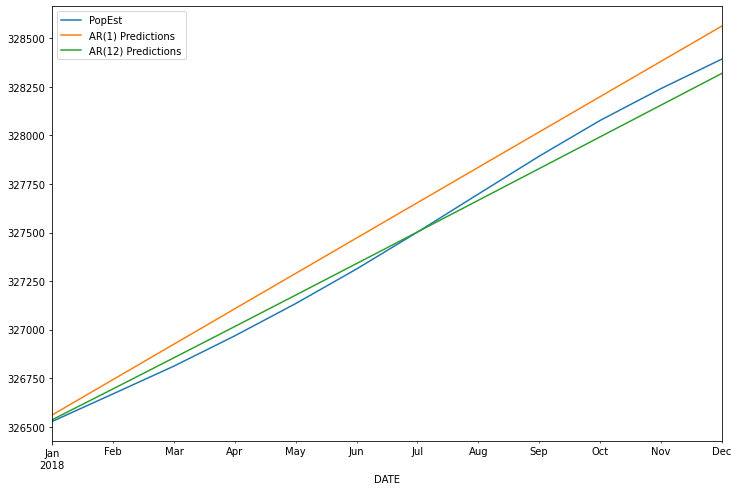

In [26]:
test.plot(figsize=(12,8),legend=True)
predictions1.plot(figsize=(12,8),legend=True)
predictions2.plot(figsize=(12,8),legend=True)

In [27]:
ARfit = model.fit(ic='t-stat') 

In [28]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [34]:
predictions8 = ARfit.predict(start,end)
predictions8 = predictions8.rename('AR(8) Predictions')

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
labels=['AR1','AR2','AR8']

In [35]:
preds= [predictions1,predictions2,predictions8]

In [36]:
for i in range(3):
    error=mean_squared_error(test['PopEst'],preds[i])
    print(f'{labels[i]} MSE was {error}')

AR1 MSE was 17449.714242014332
AR2 MSE was 2713.258895540958
AR8 MSE was 186.97809636815634


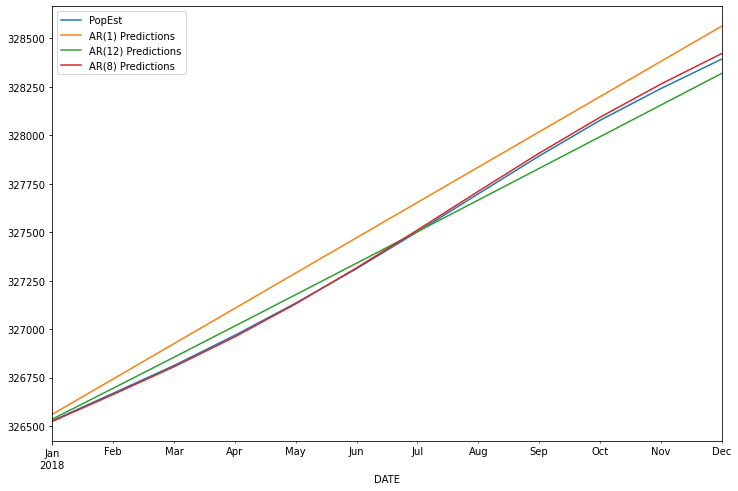

In [37]:
test.plot(figsize=(12,8),legend=True)
predictions1.plot(figsize=(12,8),legend=True)
predictions2.plot(figsize=(12,8),legend=True)
predictions8.plot(figsize=(12,8),legend=True)

In [40]:
#FORECASTING_FUTURE!!

model = AR(df['PopEst'])
ARfit = model.fit(maxlag=8)
forcasted_values = ARfit.predict(start=len(df),end=len(df)+12).rename('forecast')


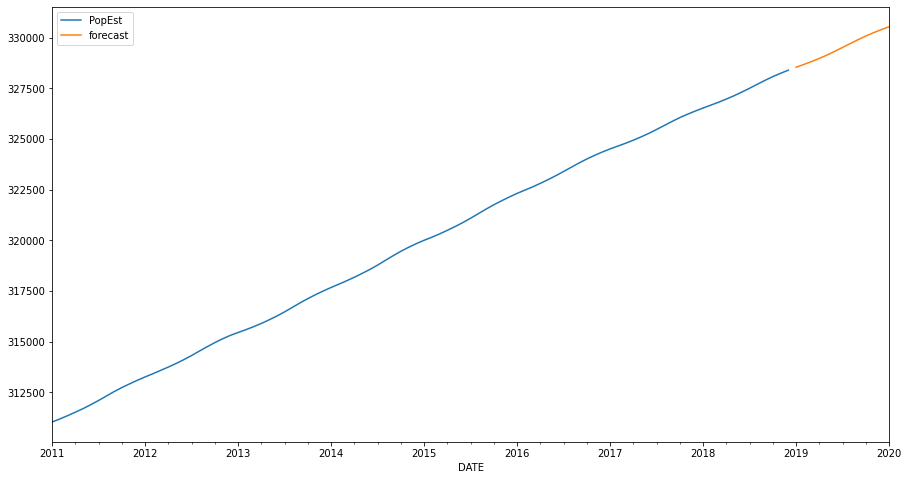

In [43]:
df['PopEst'].plot(figsize=(15,8),legend=True)
forcasted_values.plot(legend=True)